In [1]:
import fastf1
from fastf1 import get_session
from fastf1.utils import delta_time
import matplotlib.pyplot as plt
# Features and target
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from scripts_models import data_retriever as drt
import lap_utils as lu

## Using Loader functions to load all the data we'll need for corner analysis

# Lap data for a driver: We'll use free practice 1 as base data

# Load fp1 data csv and cache

# Load and structure needed data using the data_retriever script

In [2]:
fastf1.Cache.enable_cache('/Users/nooralindeflaten/f1_ML_predictor/data/cache')  # or wherever your cache lives

# Get the session
year = 2022
grand_prix = 'Monaco'
round_number = 7
driver = 'LEC'


session = drt.get_fastf1_session('FP1', year, round_number)
circuit_info = session.get_circuit_info()
leclerc_session_laps = drt.get_driver_laps(session, driver)
leclerc_processed_laps = drt.load_processed_csv('leclerc','fp1', year, 'monaco')


core           INFO 	Loading data for Monaco Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '3', '4', '5', '6', '10', '11', '14', '16', '18', '20', '22', '23', '24', '31', '44', '47', '55', '63', '77']


In [12]:
sessionr = drt.get_fastf1_session('R', year, round_number)

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '55', '1', '16', '63', '4', '14', '44', '77', '5', '10', '31', '3', '18', '6', '24', '22', '23', '47', '20']


In [15]:
leclerc_session_laps.get_weather_data()

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
16,0 days 00:16:14.383000,30.0,31.0,1015.2,False,54.8,206,0.0
18,0 days 00:18:14.397000,29.9,31.0,1015.2,False,54.7,199,0.6
19,0 days 00:19:14.390000,29.9,31.0,1015.2,False,54.6,205,1.0
20,0 days 00:20:14.394000,29.9,31.0,1015.2,False,54.6,181,0.8
22,0 days 00:22:14.392000,30.3,31.0,1015.2,False,54.4,191,1.5
23,0 days 00:23:14.391000,30.3,32.0,1015.2,False,53.4,184,2.2
25,0 days 00:25:14.393000,30.4,32.0,1015.2,False,53.9,190,0.8
26,0 days 00:26:14.409000,30.5,31.0,1015.0,False,54.0,0,1.0
28,0 days 00:28:14.393000,30.7,30.0,1015.0,False,53.7,94,0.0
30,0 days 00:30:14.407000,30.7,30.0,1015.0,False,53.6,189,0.8


In [11]:
quick_laps = session.laps.pick_quicklaps()

# print information about the quick laps
def print_quick_laps_info(quick_laps):
    print(f"Number of quick laps: {len(quick_laps)}")
    print("Quick laps:")
    for lap in quick_laps.iterrows():
        lap = lap[1]
        print(f"Lap {lap['LapNumber']} - Driver: {lap['Driver']} - Time: {lap['LapTime']}")
    print("\n")

print_quick_laps_info(quick_laps)

Number of quick laps: 189
Quick laps:
Lap 5.0 - Driver: VER - Time: 0 days 00:01:16.582000
Lap 7.0 - Driver: VER - Time: 0 days 00:01:16.276000
Lap 9.0 - Driver: VER - Time: 0 days 00:01:15.933000
Lap 11.0 - Driver: VER - Time: 0 days 00:01:15.327000
Lap 16.0 - Driver: VER - Time: 0 days 00:01:16.005000
Lap 18.0 - Driver: VER - Time: 0 days 00:01:15.605000
Lap 21.0 - Driver: VER - Time: 0 days 00:01:14.712000
Lap 4.0 - Driver: RIC - Time: 0 days 00:01:17.123000
Lap 6.0 - Driver: RIC - Time: 0 days 00:01:16.934000
Lap 10.0 - Driver: RIC - Time: 0 days 00:01:16.449000
Lap 11.0 - Driver: RIC - Time: 0 days 00:01:16.307000
Lap 14.0 - Driver: RIC - Time: 0 days 00:01:15.700000
Lap 17.0 - Driver: RIC - Time: 0 days 00:01:15.241000
Lap 20.0 - Driver: RIC - Time: 0 days 00:01:15.358000
Lap 24.0 - Driver: RIC - Time: 0 days 00:01:15.470000
Lap 27.0 - Driver: RIC - Time: 0 days 00:01:15.157000
Lap 28.0 - Driver: RIC - Time: 0 days 00:01:17.116000
Lap 31.0 - Driver: RIC - Time: 0 days 00:01:18.26

## Testing functions for analysing a corner using a lap
- Use find closest pos to link the position data to the corner
- slice car data for the corner

## To extract features

- We need a lap as lap object to: get_pos_data and get_car_data

# Plan:
Use car data and pos data to construct corner analysis

Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,speed_avg,rpm_avg,throttle_avg,brake_avg,TrackTemp,Pressure,AirTemp,Humidity,WindSpeed,Rainfall,WindDirection,Session

corner data:
X	Y	Number	Letter	Angle	Distance
0	-7381.106934	-4719.949219	1		140.384631	195.491907
1	-3634.549072	-3769.346436	2		103.015117	568.460183

### weather data
Time	AirTemp	Humidity	Pressure	Rainfall	TrackTemp	WindDirection	WindSpeed
16	0 days 00:16:14.383000	30.0	31.0	1015.2	False	54.8	206	0.0

### car data:
Date	RPM	Speed	nGear	Throttle	Brake	DRS	Source	Time	SessionTime
0	2022-05-27 12:00:31.306	4584.0	40.0	1	12.0	False	8	car	0 days 00:00:00.226000	0 days 00:15:30.372000
1	2022-05-27 12:00:31.586	5095.0	42.0	1	16.0	False	8	car	0 days 00:00:00.506000	0 days 00:15:30.652000
2	2022-05-27 12:00:31.746	4939.0	43.0	1	16.0	False	8	car	0 days 00:00:00.666000	0 days 00:15:30.812000
3	2022-05-27 12:00:31.986	5343.0	44.0	1	18.0	False	8	car	0 days 00:00:00.906000	0 days 00:15:31.052000
4	2022-05-27 12:00:32.226	5594.0	47.0	1	16.0	False	8	car	0 days 00:00:01.146000	0 days 00:15:31.292000


Date	RPM	Speed	nGear	Throttle	Brake	DRS	Source	Time	SessionTime	Distance
0	2022-05-27 12:00:31.306	4584.0	40.0	1	12.0	False	8	car	0 days 00:00:00.226000	0 days 00:15:30.372000	2.511111
1	2022-05-27 12:00:31.586	5095.0	42.0	1	16.0	False	8	car	0 days 00:00:00.506000	0 days 00:15:30.652000	5.777778
2	2022-05-27 12:00:31.746	4939.0	43.0	1	16.0	False	8	car	0 days 00:00:00.666000	0 days 00:15:30.812000	7.688889
3	2022-05-27 12:00:31.986	5343.0	44.0	1	18.0	False	8	car	0 days 00:00:00.906000	0 days 00:15:31.052000	10.622222
4	2022-05-27 12:00:32.226	5594.0	47.0	1	16.0	False	8	car	0 days 00:00:01.146000	0 days 00:15:31.292000	



- Can be filtered through breaking data. We could use this to create a "breaking" point chart
- Create sonez of breaking, speed line, 
- we'll get the best sector times for all laps, then we'll use the corner,breaking,position sections to see what driving worked well
- so we need functions in a single lap to: create an overview of breaking intervals based on the similar break time data. We could even
    futher dive in this by using the distance field from the start of the breaking to the end of a certain breakpoint to decide how much breakpower was used.
- For corner analysis we'll do the same functions on driverdata that happens right before and right after the corner. If we create a function or maybe model that takes a lap and driverdata to create thresholds for hard-light-medium breaking behaviour we could say like (hard breaking before turn...) and then when this works will tune the data so our model has enough data to find the most standardised breaking range.
- The pos data will be used later for creating an optimal racing-line model. 

### Pos data

Date	Status	X	Y	Z	Source	Time	SessionTime
0	2022-05-27 12:00:31.083	OnTrack	-7572.0	-6658.0	0.0	pos	0 days 00:00:00.003000	0 days 00:15:30.149000
1	2022-05-27 12:00:31.383	OnTrack	-7584.0	-6627.0	0.0	pos	0 days 00:00:00.303000	0 days 00:15:30.449000
2	2022-05-27 12:00:31.543	OnTrack	-7591.0	-6611.0	0.0	pos	0 days 00:00:00.463000	0 days 00:15:30.609000
3	2022-05-27 12:00:31.783	OnTrack	-7605.0	-6575.0	0.0	pos	0 days 00:00:00.703000	0 days 00:15:30.849000
4	2022-05-27 12:00:32.083	OnTrack	-7614.0	-6550.0	0.0	pos	0 days 00:00:01.003000	0 days 00:15:31.149000



## Dataframes
- FP1 processed dataframe: Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,speed_avg,rpm_avg,throttle_avg,brake_avg,TrackTemp,Pressure,AirTemp,Humidity,WindSpeed,Rainfall,WindDirection,Session

- FP1 cached lap_data would be needed to get the car_pos data. since FP1 df does not have the functions provided by fastf1
- We'll need a df of the corners when we're using them for specific things.

- When for instance car_data is used to find breaking-sectors we would return this as a df?
- We'll still need the fastf1 car_data later to take use of the built-in functions. We need a list of what built-in vs. self-made calculations to determine what functions we would need and what each function would need as input

In [13]:
def slice_car_data_by_distance(car_data, start_distance, end_distance):
    """Return a slice of car data between start_distance and end_distance."""
    # Filter the car data based on the distance
    sliced_data = car_data[car_data['Distance'].between(start_distance, end_distance)].reset_index(drop=True)
    # Check if sliced_data is empty
    if sliced_data.empty:
        raise ValueError(f"No data found between distances {start_distance} and {end_distance}.")
    # return the sliced data
    return sliced_data

def slice_car_data_by_brake(car_data):
    """
    Return a list of tuples (start_distance, end_distance) for contiguous brake zones.
    Groups continuous segments in car_data where Brake == True.
    """
    brake_data = car_data[car_data['Brake'] == True].reset_index()

    if brake_data.empty:
        return []

    # Find breaks in the index to separate zones
    brake_data['group'] = (brake_data['index'].diff() != 1).cumsum()

    brake_zones = []
    for _, group_df in brake_data.groupby('group'):
        start_distance = group_df.iloc[0]['Distance']
        end_distance = group_df.iloc[-1]['Distance']
        brake_zones.append((start_distance, end_distance))

    return brake_zones


def compute_telemetry_averages(car_data_slice):
    return {
        'speed_avg': car_data_slice['Speed'].mean(),
        'rpm_avg': car_data_slice['RPM'].mean(),
        'throttle_avg': car_data_slice['Throttle'].mean(),
        'brake_pct': car_data_slice['Brake'].sum() / len(car_data_slice)
    }
    
    
    
def build_brake_zones(car_data, brake_zone_indices):
    """
    Takes car_data and list of (start_index, end_index) tuples for brake zones.
    Returns a DataFrame of averaged telemetry data per zone.
    """
    zones = []

    # Iterate through each brake zone and compute averages for telemetry data in that zone
    for start, end in brake_zone_indices:
        zone_data = slice_car_data_by_distance(car_data, start, end)
        zone_data
        # Ensure zone_data is not empty
        if zone_data.empty:
            continue
        # Compute averages for telemetry data in the zone
        zones.append({
            'start_session_time': zone_data['SessionTime'].iloc[0],
            'end_session_time': zone_data['SessionTime'].iloc[-1],
            'start_distance': zone_data['Distance'].iloc[0],
            'end_distance': zone_data['Distance'].iloc[-1],
            **compute_telemetry_averages(zone_data)
        })
        
        

    return pd.DataFrame(zones)



In [14]:
sample_lap = leclerc_session_laps[leclerc_session_laps['LapNumber'] == 1].iloc[0]
car_data = sample_lap.get_car_data().add_distance()

brake_zones_idx = slice_car_data_by_brake(sample_lap.get_car_data().add_distance())
brake_zones_df = build_brake_zones(car_data, brake_zones_idx)


In [142]:
brake_zones_df

,start_session_time,end_session_time,start_distance,end_distance,speed_avg,rpm_avg,throttle_avg,brake_pct
0,0 days 00:15:39.372000,0 days 00:15:39.932000,174.456111,183.500556,60.333333,7019.000000,0.000000,1.0
1,0 days 00:15:52.892000,0 days 00:15:55.532000,563.433889,674.180833,154.363636,9191.818182,13.545455,1.0
2,0 days 00:16:00.172000,0 days 00:16:00.973000,817.058611,840.120278,106.333333,7746.666667,2.333333,1.0
3,0 days 00:16:05.572000,0 days 00:16:08.372000,985.593333,1070.785000,112.833333,8077.250000,0.750000,1.0
4,0 days 00:16:09.212000,0 days 00:16:09.212000,1086.496111,1086.496111,66.000000,5571.000000,0.000000,1.0
5,0 days 00:16:13.172000,0 days 00:16:15.252000,1165.340556,1202.209167,68.222222,6825.777778,0.000000,1.0
6,0 days 00:16:20.092000,0 days 00:16:20.092000,1264.620278,1264.620278,71.000000,6074.000000,7.000000,1.0
7,0 days 00:16:23.652000,0 days 00:16:24.772000,1331.088056,1355.065833,82.250000,7037.500000,15.500000,1.0
8,0 days 00:16:35.452000,0 days 00:16:36.692000,1783.523056,1852.678611,202.166667,9781.000000,34.000000,1.0
9,0 days 00:16:38.412000,0 days 00:16:41.333000,1935.545278,2028.170556,118.692308,8052.153846,4.923077,1.0


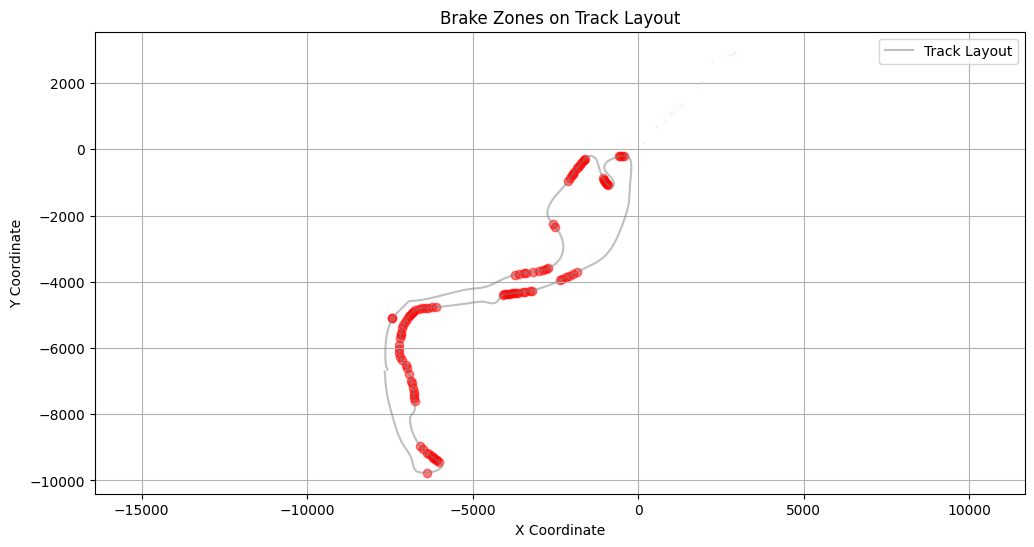

In [38]:
pos_data = sample_lap.get_pos_data()
# We'll use the X, Y coordinates to create the driver's position on the track
# we'll make the breaking zones a bit more visible by adding a circle around the zone
# we'll make all the X and Y coordinates matching the distance break data a different colour
def plot_brake_zones(pos_data, brake_zones_df):
    '''
    The car_data has properties: Date	RPM	Speed	nGear	Throttle	Brake	DRS	Source	Time	SessionTime
    The pos_data has properties: Date, Status, X, Y, Z, Time, SessionTime
    
    the breaksones_df has properties: start_session_time, end_session_time, start_distance, end_distance, speed_avg, rpm_avg, throttle_avg, brake_pct
    If we match the pos_data session time with the breakzones_df session time, we can use all pos data rows within the start and end session time to plot the brake zones.
    '''
    # Create a new figure
    plt.figure(figsize=(12, 6))
    # Plot the track layout
    plt.plot(pos_data['X'], pos_data['Y'], color='gray', alpha=0.5, label='Track Layout')
    # Plot the brake zones
    for _, zone in brake_zones_df.iterrows():
        # Create a mask for the pos_data within the start and end session time
        mask = (pos_data['SessionTime'] >= zone['start_session_time']) & (pos_data['SessionTime'] <= zone['end_session_time'])
        plt.scatter(pos_data.loc[mask, 'X'], pos_data.loc[mask, 'Y'], color='red', alpha=0.5)
        # Draw a circle around the brake zone
        circle = plt.Circle((zone['start_distance'], zone['end_distance']), 5, color='red', alpha=0.2)
        plt.gca().add_patch(circle)
    # Add labels and title
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Brake Zones on Track Layout')
    plt.legend()
    plt.axis('equal')
    plt.grid()
    plt.show()

plot_brake_zones(pos_data, brake_zones_df)

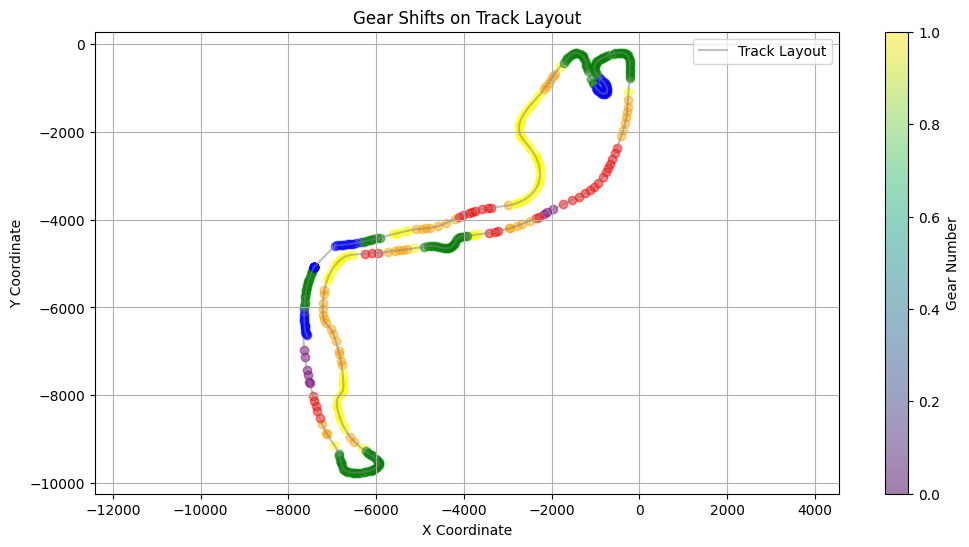

In [37]:


def compute_telemetry_averages(car_data_slice):
    return {
        'speed_avg': car_data_slice['Speed'].mean(),
        'rpm_avg': car_data_slice['RPM'].mean(),
        'throttle_avg': car_data_slice['Throttle'].mean(),
        'brake_pct': car_data_slice['Brake'].sum() / len(car_data_slice)
    }
    
    
def slice_car_data_by_gear_zone(car_data):
    """
    Return a list of tuples (start_distance, end_distance, gear) for contiguous zones with same Gear.
    Groups continuous segments where Gear stays constant.
    """
    if 'nGear' not in car_data.columns:
        raise ValueError("car_data must contain a 'Gear' column.")

    gear_data = car_data.reset_index()

    # Identify change points where gear changes
    gear_data['gear_group'] = (gear_data['nGear'].diff() != 0).cumsum()

    gear_zones = []
    for _, group_df in gear_data.groupby('gear_group'):
        if group_df.empty:
            continue
        gear = group_df.iloc[0]['nGear']
        start_distance = group_df.iloc[0]['Distance']
        end_distance = group_df.iloc[-1]['Distance']
        gear_zones.append((start_distance, end_distance, gear))

    return gear_zones

def build_gear_zones(car_data):
    """
    Takes car_data and list of (start_index, end_index, gear) tuples for gear zones.
    Returns a DataFrame of averaged telemetry data per zone.
    """
    zones = []

    # Iterate through each gear zone and compute averages for telemetry data in that zone
    for start, end, gear in slice_car_data_by_gear_zone(car_data):
        zone_data = slice_car_data_by_distance(car_data, start, end)
        # Ensure zone_data is not empty
        if zone_data.empty:
            continue
        # Compute averages for telemetry data in the zone
        zones.append({
            'start_session_time': zone_data['SessionTime'].iloc[0],
            'end_session_time': zone_data['SessionTime'].iloc[-1],
            'start_distance': zone_data['Distance'].iloc[0],
            'end_distance': zone_data['Distance'].iloc[-1],
            'nGear': gear,
        })

    return pd.DataFrame(zones)

def plot_pos_data_gear_shifts(pos_data, gear_zones):
    """
    Plot the gear shifts on the track layout.
    """
    # Create a new figure
    plt.figure(figsize=(12, 6))
    # Plot the track layout
    plt.plot(pos_data['X'], pos_data['Y'], color='gray', alpha=0.5, label='Track Layout')
    # Plot the gear shifts
    gear_colours = {
        1: 'blue',
        2: 'green',
        3: 'yellow',
        4: 'orange',
        5: 'red',
        6: 'purple',
        7: 'pink',
        8: 'brown'
    }
    for _, row in gear_zones.iterrows():
        mask = (pos_data['SessionTime'] >= row['start_session_time']) & (pos_data['SessionTime'] <= row['end_session_time'])
        plt.scatter(pos_data.loc[mask, 'X'], pos_data.loc[mask, 'Y'], color=gear_colours[row['nGear']], alpha=0.5)
    # Add labels and title
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Gear Shifts on Track Layout')
    plt.colorbar(label='Gear Number')
    plt.legend()
    plt.axis('equal')
    plt.grid()
    plt.show()



def analyse_zone(zone, car_data,po):
    """
    Analyse the telemetry data for a specific zone.
    """
    zone_data = slice_car_data_by_distance(car_data, zone['start_distance'], zone['end_distance'])
    if zone_data.empty:
        return None
    # Compute averages for telemetry data in the zone
    averages = compute_telemetry_averages(zone_data)
    return {
        'start_session_time': zone['start_session_time'],
        'end_session_time': zone['end_session_time'],
        'start_distance': zone['start_distance'],
        'end_distance': zone['end_distance'],
        **averages
    }

gear_zones = build_gear_zones(car_data)
plot_pos_data_gear_shifts(pos_data, gear_zones)

In [16]:
import pandas as pd

# Throttle functions

def slice_car_data_by_throttle(car_data, threshold=80):
    """
    Return a list of tuples (start_distance, end_distance) for contiguous throttle zones.
    Groups continuous segments in car_data where Throttle >= threshold%.
    """
    throttle_data = car_data[car_data['Throttle'] >= threshold].reset_index()

    if throttle_data.empty:
        return []

    # Find breaks in the index to separate zones
    throttle_data['group'] = (throttle_data['index'].diff() != 1).cumsum()

    throttle_zones = []
    for _, group_df in throttle_data.groupby('group'):
        start_distance = group_df.iloc[0]['Distance']
        end_distance = group_df.iloc[-1]['Distance']
        throttle_zones.append((start_distance, end_distance))

    return throttle_zones

def build_throttle_zones(car_data, throttle_zone_indices):
    """
    Takes car_data and list of (start_index, end_index) tuples for throttle zones.
    Returns a DataFrame of averaged telemetry data per zone.
    """
    zones = []

    # Iterate through each throttle zone and compute averages for telemetry data in that zone
    for start, end in throttle_zone_indices:
        zone_data = slice_car_data_by_distance(car_data, start, end)

        # Ensure zone_data is not empty
        if zone_data.empty:
            continue

        # Compute averages for telemetry data in the zone
        zones.append({
            'start_session_time': zone_data['SessionTime'].iloc[0],
            'end_session_time': zone_data['SessionTime'].iloc[-1],
            'start_distance': zone_data['Distance'].iloc[0],
            'end_distance': zone_data['Distance'].iloc[-1],
            **compute_telemetry_averages(zone_data)
        })

    return pd.DataFrame(zones)



def plot_throttle_zones(pos_data, throttle_zones_df, brake_zones_df):
    """
    Plot the throttle zones using X, Y coordinates from pos_data and throttle zone session times.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    plt.plot(pos_data['X'], pos_data['Y'], color='gray', alpha=0.5, label='Track Layout')

    for _, zone in throttle_zones_df.iterrows():
        mask = (pos_data['SessionTime'] >= zone['start_session_time']) & (pos_data['SessionTime'] <= zone['end_session_time'])
        plt.scatter(pos_data.loc[mask, 'X'], pos_data.loc[mask, 'Y'], color='green', alpha=0.5, label='Throttle Zone')

    for _, zone in brake_zones_df.iterrows():
        mask = (pos_data['SessionTime'] >= zone['start_session_time']) & (pos_data['SessionTime'] <= zone['end_session_time'])
        plt.scatter(pos_data.loc[mask, 'X'], pos_data.loc[mask, 'Y'], color='red', alpha=0.5, label='Brake Zone')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Throttle Zones on Track Layout')
    plt.legend()
    plt.axis('equal')
    plt.grid()
    plt.show()

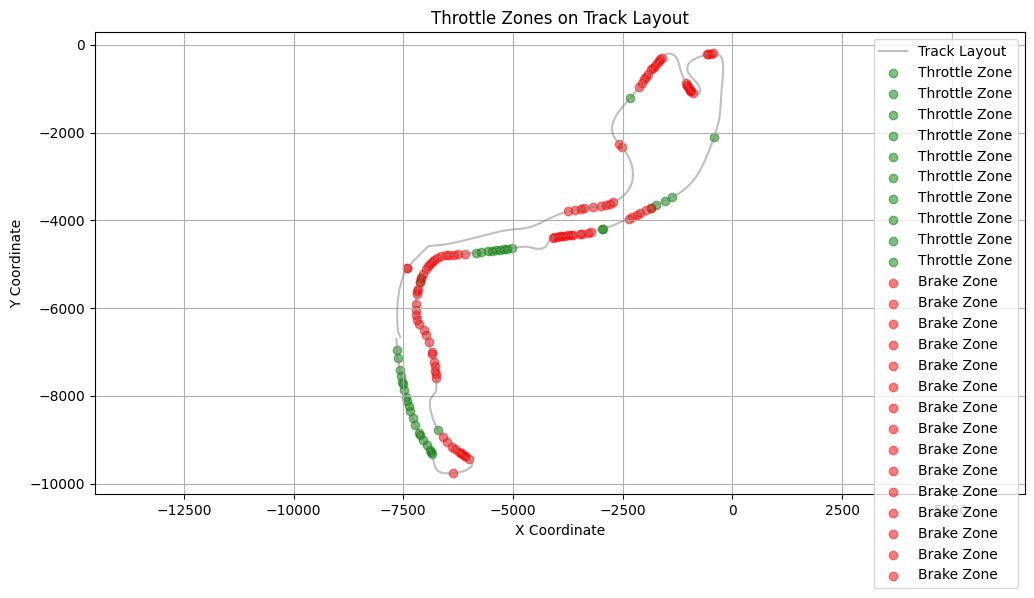

In [17]:
trothtle_zones_idx = slice_car_data_by_throttle(sample_lap.get_car_data().add_distance())
throttle_zones_df = build_throttle_zones(car_data, trothtle_zones_idx)
plot_throttle_zones(pos_data, throttle_zones_df,brake_zones_df)

In [70]:
import pandas as pd


def get_car_data_around_corner(car_data, circuit_info, window=15):
    """
    For each corner in circuit_info, slice car_data ±window meters from the corner distance.
    Returns a DataFrame with telemetry averages for corner entry/exit.
    """
    segments = []

    for _, corner in circuit_info.iterrows():
        dist = corner['Distance']
        slice_data = car_data[car_data['Distance'].between(dist - window, dist + window)].copy()

        if slice_data.empty:
            continue

        entry_data = slice_data[slice_data['Distance'] <= dist]
        exit_data = slice_data[slice_data['Distance'] >= dist]

        segments.append({
            'entry_distance': entry_data['Distance'].min() if not entry_data.empty else None,
            'exit_distance': exit_data['Distance'].max() if not exit_data.empty else None,
            'entry_session_time': entry_data['SessionTime'].min() if not entry_data.empty else None,
            'exit_session_time': exit_data['SessionTime'].max() if not exit_data.empty else None,
            'corner_number': corner['Number'],
            'corner_name': corner.get('Name', f"Turn {corner['Number']}"),
            'distance': dist,
            'entry_speed_avg': entry_data['Speed'].mean() if not entry_data.empty else None,
            'exit_speed_avg': exit_data['Speed'].mean() if not exit_data.empty else None,
            'min_speed': slice_data['Speed'].min(),
            'entry_throttle_avg': entry_data['Throttle'].mean() if not entry_data.empty else None,
            'exit_throttle_avg': exit_data['Throttle'].mean() if not exit_data.empty else None,
            'entry_brake_pct': entry_data['Brake'].sum() / len(entry_data) if not entry_data.empty else None,
            'exit_brake_pct': exit_data['Brake'].sum() / len(exit_data) if not exit_data.empty else None,
        })

    return pd.DataFrame(segments)



def plot_corner(pos_data_df):
    """
    Plot the corners on the track layout using X, Y coordinates from pos_data.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(pos_data_df['X'], pos_data_df['Y'], color='gray', alpha=0.5, label='Corner Layout')

    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Corners on Track Layout')
    plt.legend()
    plt.axis('equal')
    plt.grid()
    plt.show()
    
def plot_corners(corner_df, pos_data):
    """
    Plot the corners on the track layout using X, Y coordinates from circuit_info and car_data.
    """
    for _, corner in corner_df.iterrows():
        plot_corner(pos_data)


def slice_position_by_session_time(pos_data, start_time, end_time):
    """
    Return a slice of pos data between start_time and end_time.
    """
    # Filter the pos data based on the session time
    sliced_data = pos_data[pos_data['SessionTime'].between_time(start_time, end_time)].reset_index(drop=True)
    return sliced_data

def get_pos_segments(pos_data, corner_df, window=15):
    """
    For each corner in corner_df, slice pos_data ±window meters from the corner distance.
    Returns a DataFrame with position data around the corner.
    """
    segments = []

    for _, corner in corner_df.iterrows():
        corner_entry = corner['entry_session_time']
        corner_exit = corner['exit_session_time']
        
        slice_data = slice_position_by_session_time(pos_data, corner_entry, corner_exit)

        if slice_data.empty:
            continue

        segments.append({
            'corner_number': corner['corner_number'],
            'corner_name': corner['corner_name'],
            'X': slice_data['X'].values,
            'Y': slice_data['Y'].values,
            'Z': slice_data['Z'].values
        })

    return pd.DataFrame(segments)
def plot_pos_data(pos_data_df, corner_df):
    """
    Plot the position data on the track layout using X, Y coordinates from pos_data.
    """
    for _, pos in pos_data_df.iterrows():
        plt.figure(figsize=(12, 6))
        plt.plot(pos['X'], pos['Y'], color='gray', alpha=0.5, label='Track Layout')
        plt.scatter(pos['X'], pos['Y'], color='blue', alpha=0.5, label='Position Data')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title(f"Position Data around Corner {pos['corner_number']}: {pos['corner_name']}")
        plt.legend()
        plt.axis('equal')
        plt.grid()
        plt.show()
        


corner_df = get_car_data_around_corner(car_data, circuit_info.corners, window=15)
pos_df = get_pos_segments(pos_data, corner_df, window=15)
plot_pos_data(pos_df, corner_df)

TypeError: Index must be DatetimeIndex

In [151]:
import matplotlib.pyplot as plt
import numpy as np

def plot_corner_profiles(corner_df, metric1='entry_speed_avg', metric2='exit_speed_avg', title='Corner Speed Profile'):
    """
    Plot entry vs exit values for a given metric across corners.
    You can use this for speed, throttle, or brake.
    """
    # Drop rows with missing data
    df = corner_df.dropna(subset=[metric1, metric2])

    labels = df['corner_name']
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(14, 6))
    bars1 = ax.bar(x - width/2, df[metric1], width, label=metric1.replace('_', ' ').title(), color='skyblue')
    bars2 = ax.bar(x + width/2, df[metric2], width, label=metric2.replace('_', ' ').title(), color='salmon')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Value')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


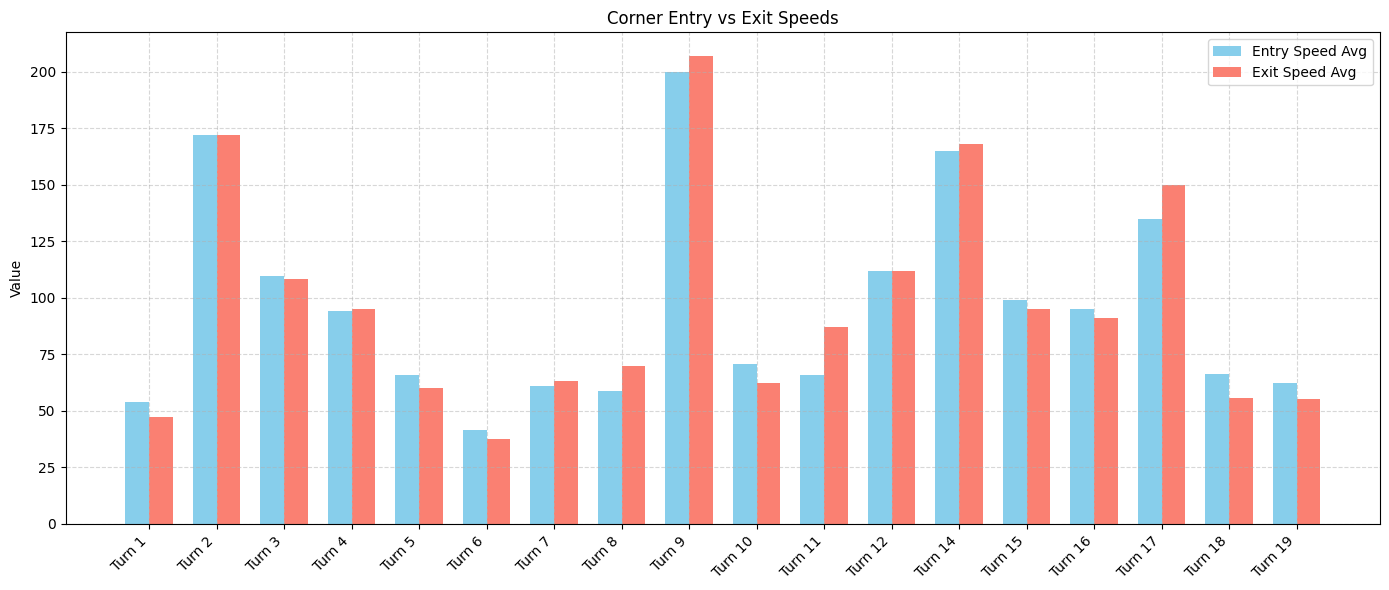

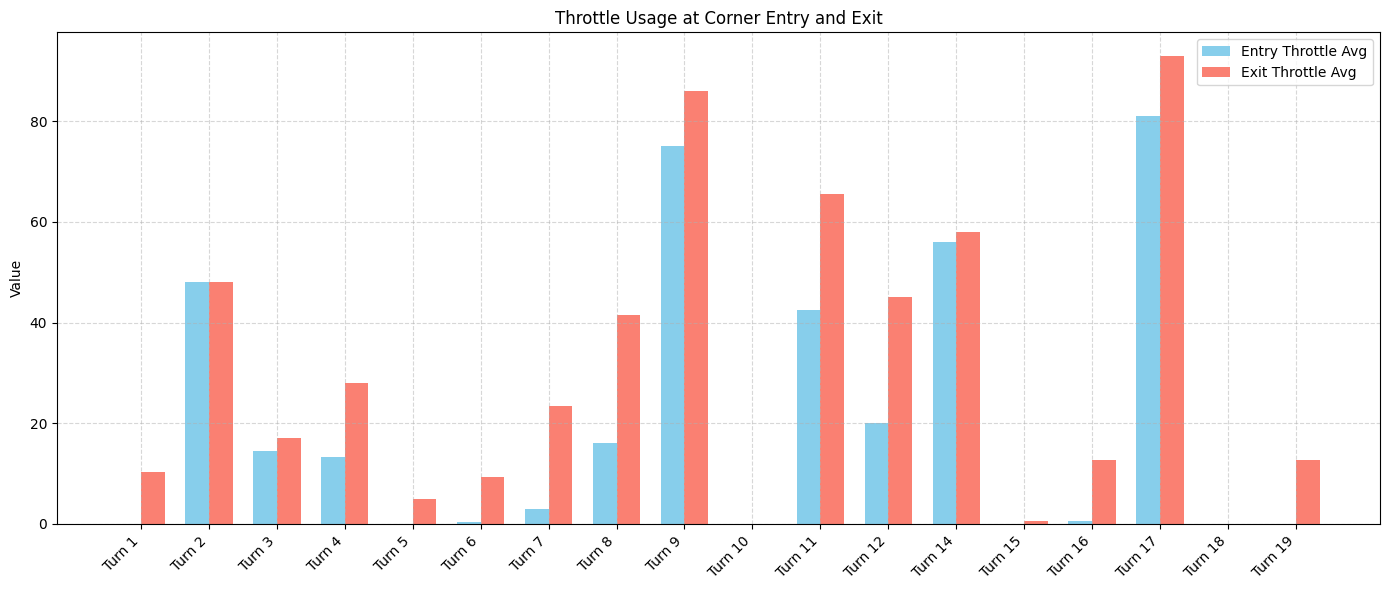

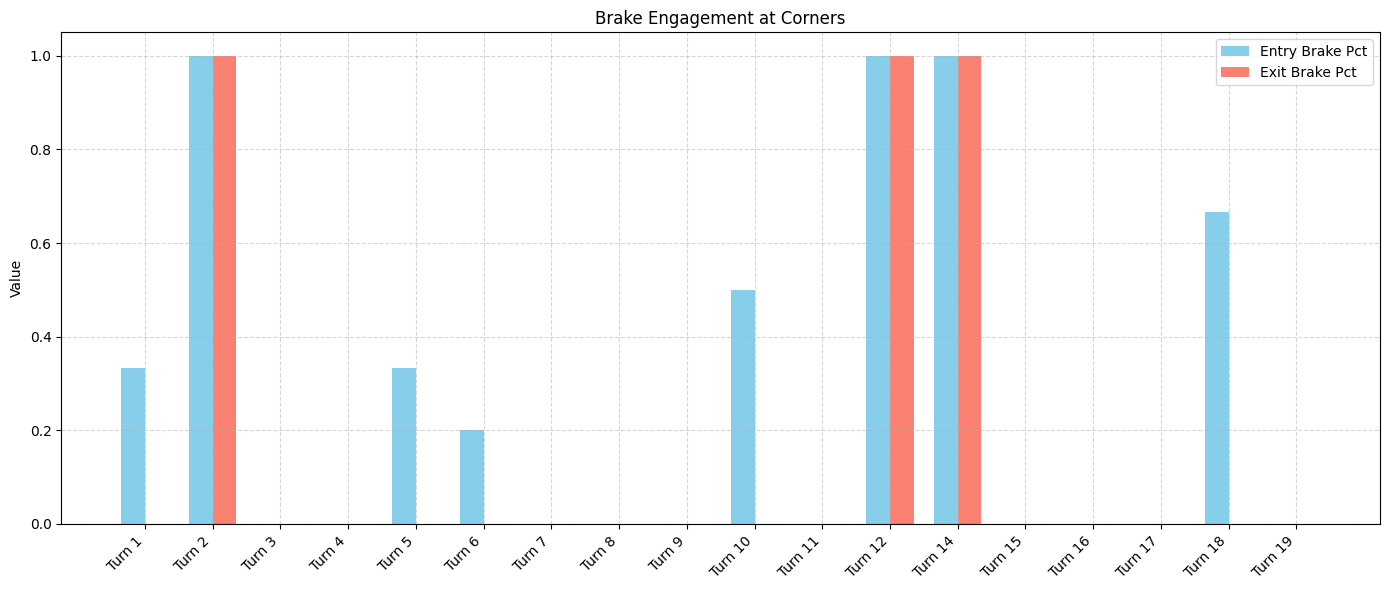

In [152]:
corner_df = get_car_data_around_corner(car_data, circuit_info.corners, window=15)
# To plot entry vs exit speed
plot_corner_profiles(corner_df, 'entry_speed_avg', 'exit_speed_avg', title='Corner Entry vs Exit Speeds')

# To plot throttle comparison
plot_corner_profiles(corner_df, 'entry_throttle_avg', 'exit_throttle_avg', title='Throttle Usage at Corner Entry and Exit')

# To plot brake % (can get spicy 🔥)
plot_corner_profiles(corner_df, 'entry_brake_pct', 'exit_brake_pct', title='Brake Engagement at Corners')


In [ ]:
def compute_acceleration_profile(car_data_slice):
    """
    Computes average acceleration/deceleration in a telemetry slice.
    """
    car_data_slice = car_data_slice.copy()
    car_data_slice['DeltaSpeed'] = car_data_slice['Speed'].diff()
    car_data_slice['DeltaTime'] = car_data_slice['SessionTime'].diff().dt.total_seconds()

    # Avoid division by zero
    car_data_slice = car_data_slice[car_data_slice['DeltaTime'] > 0]

    car_data_slice['Acceleration'] = car_data_slice['DeltaSpeed'] / car_data_slice['DeltaTime']

    return {
        'acceleration_avg': car_data_slice['Acceleration'][car_data_slice['Acceleration'] > 0].mean(),
        'deceleration_avg': car_data_slice['Acceleration'][car_data_slice['Acceleration'] < 0].mean(),
        'max_acceleration': car_data_slice['Acceleration'].max(),
        'max_deceleration': car_data_slice['Acceleration'].min()
    }

def compute_racing_line_metrics(pos_data_slice):
    """
    Compute basic metrics of the racing line:
    - Total distance driven in XY plane
    - Deviation from a straight line (entry to exit)
    """
    from numpy.linalg import norm

    # Total path distance in XY plane
    pos_data_slice = pos_data_slice.copy()
    pos_data_slice['delta_x'] = pos_data_slice['X'].diff()
    pos_data_slice['delta_y'] = pos_data_slice['Y'].diff()
    pos_data_slice['segment_dist'] = (pos_data_slice['delta_x']**2 + pos_data_slice['delta_y']**2)**0.5
    total_xy_distance = pos_data_slice['segment_dist'].sum()

    # Deviation from ideal line (start to end)
    start = pos_data_slice.iloc[0][['X', 'Y']].values
    end = pos_data_slice.iloc[-1][['X', 'Y']].values
    ideal_dist = norm(end - start)

    return {
        'total_xy_distance': total_xy_distance,
        'straight_line_distance': ideal_dist,
        'line_deviation': total_xy_distance - ideal_dist
    }
